<a href="https://colab.research.google.com/github/bhadadi/multimedia/blob/main/bhaddi_tp3_question2et3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

image = Image.open('trouve_moi_8_bit_message_(14).png')

x, y = image.size
tab = []

for j in range(y):
  for i in range(x):
    px = image.getpixel((i, j))
    r, g, b, a = px

    tab.append(bin(a)[-1])

message_bits = ''.join(tab)
message = ''

for i in range(0, len(message_bits), 8):
    byte = message_bits[i:i+8]
    if len(byte) == 8:
        message += chr(int(byte, 2))

print(message)

Question 3/3 :
Tu commences à bien maîtriser la technique !
Voici la deuxième partie de ton code secret : retards ne sont pas tolérés
Combine-la avec la partie précédente, puis rends-toi sur Moodle pour débloquer la question bonus.
Mais avant ça, sera tu relever le prochain défis ?
Cache à ton tour un message secret dans une image.
Utilise la méthode que tu as apprise et encode ce message dans l'image de ton choix.$ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ

Message caché dans l'image et sauvegardé sous image_cachee.png

Affichage de l'image cachée : source: https://www.pngwing.com/en/free-png-qgzro, auteur : Masashi Kishimoto, studio : Pierrot


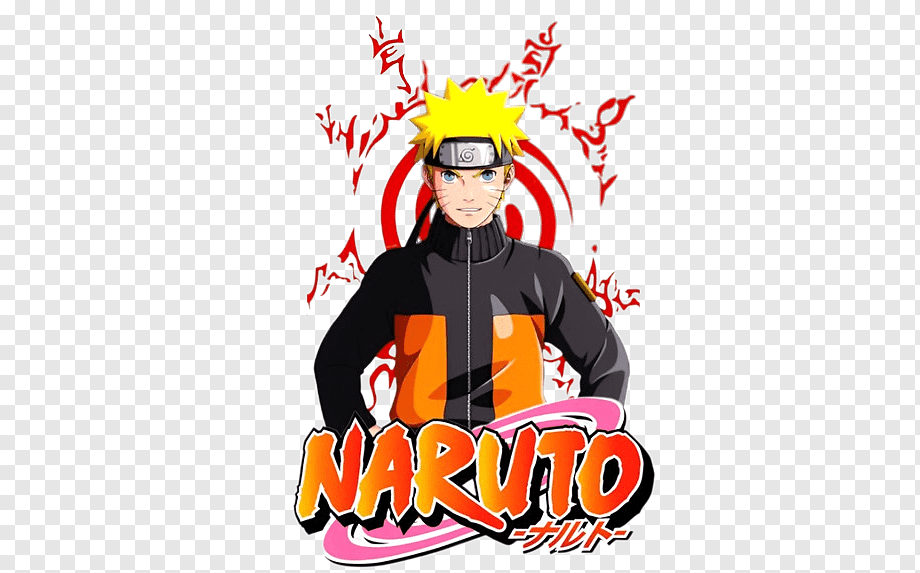

Message caché dans l'image :  Bilel en entreprise les retards ne sont pas tolérés
source: chatgpt


In [40]:
from PIL import Image



def message_to_bits(message):
    message += '\0'
    bits = []
    for char in message:
        bin_char = bin(ord(char))[2:].zfill(8)
        bits.extend([int(bit) for bit in bin_char])
    return bits

def hide_message_in_image(image_path, message, output_path):
    image = Image.open(image_path).convert("RGBA")
    x, y = image.size
    pixels = image.load()

    message_bits = message_to_bits(message)
    total_bits = len(message_bits)

    if total_bits > x * y * 3:
        raise ValueError("Le message est trop long pour être caché dans cette image.")

    bit_index = 0

    for j in range(y):
        for i in range(x):
            if bit_index >= total_bits:
                break

            r, g, b, a = pixels[i, j]


            if bit_index < total_bits:
                r = (r & ~1) | message_bits[bit_index]
                bit_index += 1
            if bit_index < total_bits:
                g = (g & ~1) | message_bits[bit_index]
                bit_index += 1
            if bit_index < total_bits:
                b = (b & ~1) | message_bits[bit_index]
                bit_index += 1


            pixels[i, j] = (r, g, b, a)

        if bit_index >= total_bits:
            break

    image.save(output_path)
    print(f"Message caché dans l'image et sauvegardé sous {output_path}")

    img = Image.open(output_path)
    print('\nAffichage de l\'image cachée : source: https://www.pngwing.com/en/free-png-qgzro, auteur : Masashi Kishimoto, studio : Pierrot')
    display(img)

def bits_to_message(bits):
    message = ''
    for i in range(0, len(bits), 8):
        byte = bits[i:i+8]
        if len(byte) == 8:
            char = chr(int(''.join(byte), 2))
            if char == '\0': # Arrêter à la fin du message
                break
            message += char
    return message

def retrieve_message_from_image(image_path):
    image = Image.open(image_path)
    x, y = image.size
    pixels = image.load()
    tab = []

    for j in range(y):
        for i in range(x):
            r, g, b, a = pixels[i, j]

            tab.append(bin(r)[-1])
            tab.append(bin(g)[-1])
            tab.append(bin(b)[-1])

    message = bits_to_message(tab)
    return message

message = "Bilel en entreprise les retards ne sont pas tolérés"
hide_message_in_image("naruto.png", message, "image_cachee.png")

hidden_message = retrieve_message_from_image("image_cachee.png")
print("Message caché dans l'image : ", hidden_message)

print('source: chatgpt')